<a href="https://colab.research.google.com/github/alfredcs/CVWorkshop17/blob/main/TransUNet_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Image Segmentation with Vision Transformers as a strong Encoder


In this notebook, we provide a demo of the work available in this [repo](https://github.com/KenzaB27/TransUnet). 

TransUNet is a hybrid CNN-Transformer in a U-shaped architecture able to leverage both detailed high-resolution spatial information from CNN features and the global context encoded by Transformers in order to perform medical image segmentation.

TansUNet was proposed by J.Chen et al. [in Feb 2021](https://arxiv.org/pdf/2102.04306.pdf).

We reproduced the work of the paper above as part of the course Deep Learning in Data Science DD2424 @ [KTH](https://www.kth.se/en). 

Authors:
*   [Agnieszka Miszkurka](https://www.linkedin.com/in/agnieszka-miszkurka/)
*   [Tobias Höppe](https://www.linkedin.com/in/tobias-h%C3%B6ppe-3b3398199/)
*   [Kenza Bouzid](https://www.linkedin.com/in/kenza-bouzid/?locale=en_US)

# Environment Set Up

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ugXdSGGDJaOM-rOx_boQYoO71tTSe9k6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ugXdSGGDJaOM-rOx_boQYoO71tTSe9k6" -O 224_transunet_train_all_data2.zip && rm -rf /tmp/cookies.txt
!unzip 224_transunet_train_all_data2.zip
!rm -r 224_transunet_train_all_data2.zip

--2022-05-11 22:22:07--  https://docs.google.com/uc?export=download&confirm=t&id=1ugXdSGGDJaOM-rOx_boQYoO71tTSe9k6
Resolving docs.google.com (docs.google.com)... 142.250.141.138, 142.250.141.102, 142.250.141.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-18-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/adkrfntfsf76dbg3md2c9meoaopaqui7/1652307675000/08591946091621000552/*/1ugXdSGGDJaOM-rOx_boQYoO71tTSe9k6?e=download [following]
--2022-05-11 22:22:08--  https://doc-0s-18-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/adkrfntfsf76dbg3md2c9meoaopaqui7/1652307675000/08591946091621000552/*/1ugXdSGGDJaOM-rOx_boQYoO71tTSe9k6?e=download
Resolving doc-0s-18-docs.googleusercontent.com (doc-0s-18-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-0s-18-docs.googleusercontent.com (doc-

In [2]:
!git clone https://github.com/KenzaB27/TransUnet.git
%cd TransUnet
!pip install -r requirements.txt 

Cloning into 'TransUnet'...
remote: Enumerating objects: 1170, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1170 (delta 25), reused 25 (delta 25), pack-reused 1137
Receiving objects: 100% (1170/1170), 63.07 MiB | 17.97 MiB/s, done.
Resolving deltas: 100% (782/782), done.
Checking out files: 100% (25/25), done.
/content/TransUnet
     |████████████████████████████████| 77 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 16.8 MB/s 
     |████████████████████████████████| 48.4 MB 2.1 MB/s 
     |████████████████████████████████| 151 kB 45.7 MB/s 
     |████████████████████████████████| 462 kB 38.6 MB/s 
  Created wheel for ml-collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94524 sha256=f913a6f920bde83149c9a1df7f7cbf1fd951b51c457698b2830e31151329b241
  Stored in directory: /root/.cache/pip/wheels/b7/da/64/33c926a1b10ff19791081b705879561b715a8341a856a3bbd2
  Created wheel for validators: filename

In [3]:
import data_processing.data_parser as data_parser
import models.transunet as transunet
import utils.visualize as visualize
import experiments.config as conf
import importlib

# TransUNet in Action 

In [4]:
BATCH_SIZE=1

### Load Model and Test Dataset 

In [5]:
saved_model_path = "/content/224_transunet_train_all_data2/model"
config = conf.get_transunet()
network = transunet.TransUnet(config)
network.load_model(saved_model_path=saved_model_path)

In [6]:
importlib.reload(data_parser)
data_reader = data_parser.DataReader(src_path="synapse_ct_scans/", height=224, width=224, depth=3)
test_dataset = data_reader.get_test_data(image_size=224, use_self_filenames=True, shuffle=True)

## Segment Synapse multi-organ slices

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


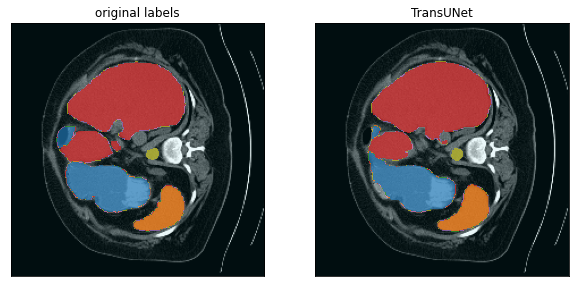

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


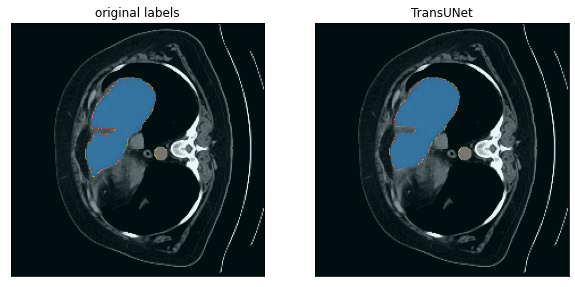

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


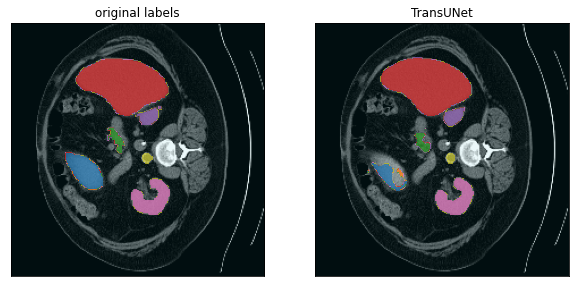

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


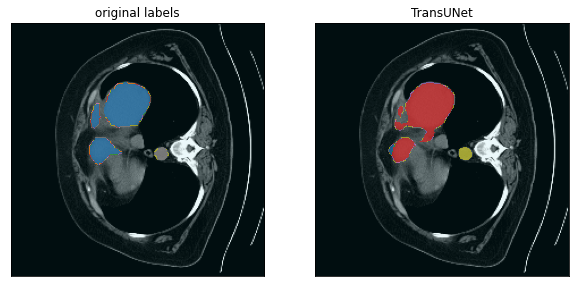

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


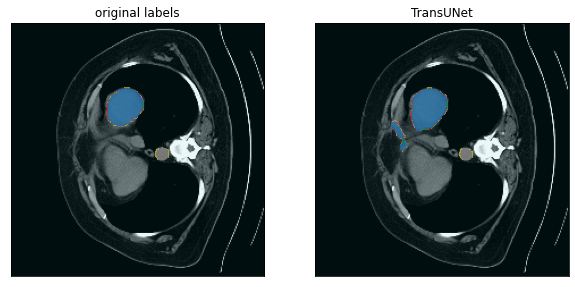

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


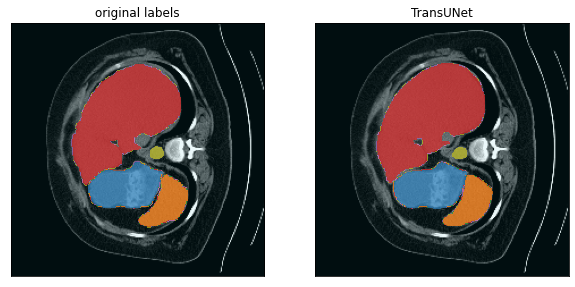

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


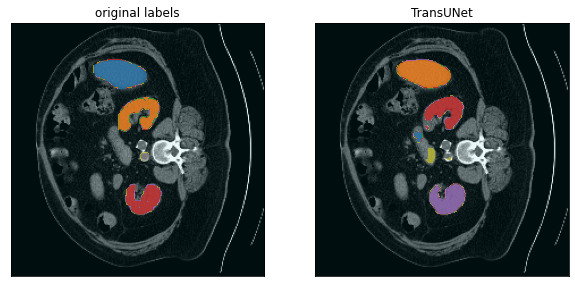

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


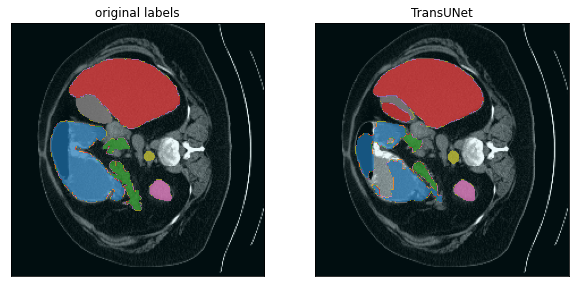

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


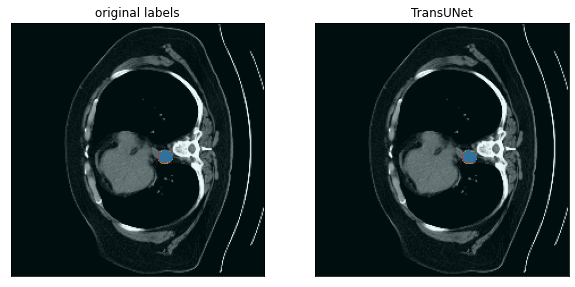

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


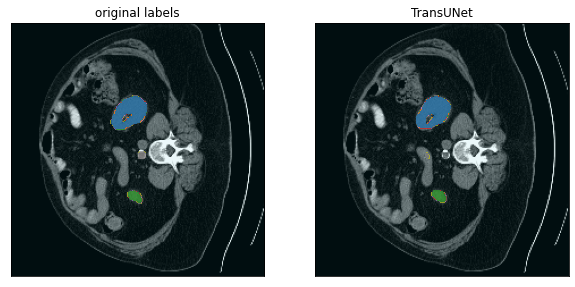

In [7]:
for i, img_lab in enumerate(test_dataset.take(32)):
  img = img_lab[0]
  lab = img_lab[1]
  visualize.visualize_non_empty_predictions(img, lab, [network])